In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Generation

In [10]:
x1_set = np.random.normal(15,3,100)
x2_set = np.random.normal(35,3,100)
y1_set = np.random.normal(45,3,100)
y2_set = np.random.normal(25,3,100)

In [11]:
x = np.concatenate((x1_set, x2_set, x2_set))
y = np.concatenate((y1_set, y2_set, y1_set))

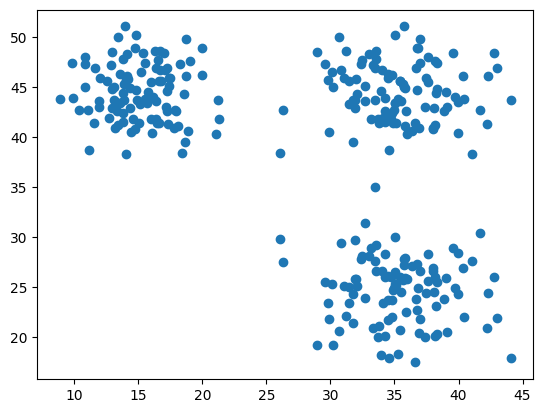

In [12]:
plt.scatter(x,y)

In [19]:
X = np.stack((x,y), axis=1)
X.shape

(300, 2)

# Clustering 

In [21]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=50)
y_pred = kmeans.fit_predict(X)

In [35]:
clustered_data = [{"x":[], "y":[]} for i in range(k)]

In [36]:
n_examples = X.shape[0]
for i in range(n_examples):
    clustered_data[y_pred[i]]["x"].append(X[i,0])
    clustered_data[y_pred[i]]["y"].append(X[i,1])

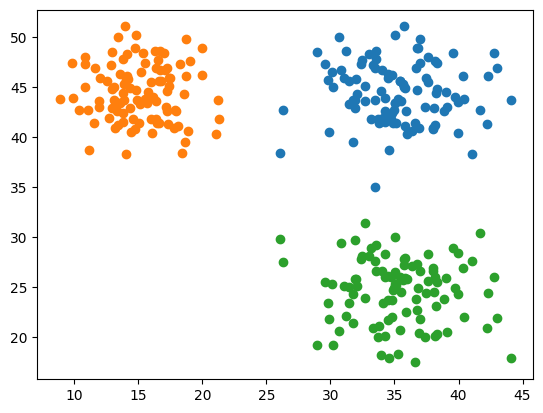

In [39]:
plt.figure()
for i in range(k):
    plt.scatter(clustered_data[i]["x"], clustered_data[i]["y"])
plt.show()

This way perfect, but how do we choose k if we don't already know it ? 

# Choosing K

In [42]:
K_pool = [2,3,4,5,10]
inertia = []
algos = []

In [43]:
for k_ in K_pool:
    kmeans = KMeans(n_clusters=k_, n_init=50)
    y_pred = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    algos.append(kmeans)

Text(0, 0.5, 'Inertia')

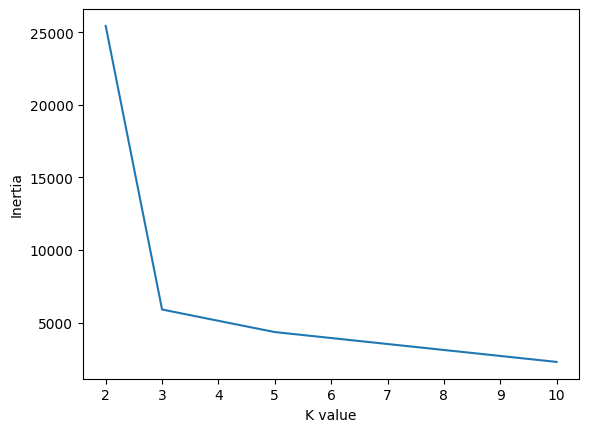

In [45]:
plt.plot(K_pool, inertia)
plt.xlabel("K value")
plt.ylabel("Inertia")

We observe an elbow for k = 3. This is usually a good indicator, although not the best. To be more precise, we can use silhouette scores.

In [46]:
from sklearn.metrics import silhouette_score
s_scores = []
for algo in algos:
    s_scores.append(silhouette_score(X, algo.labels_))

Text(0, 0.5, 'Silhouette score')

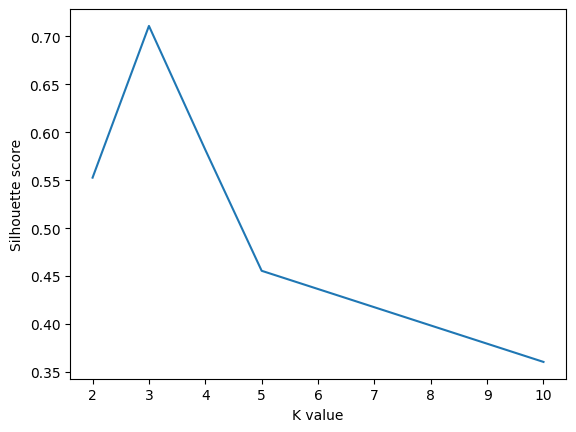

In [48]:
plt.plot(K_pool, s_scores)
plt.xlabel("K value")
plt.ylabel("Silhouette score")

The best score is clearly reached for K = 3.